<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Basically in random forest we take the avg of number of decisssion tree output and predict as per the majority vote**

<div style="text-align: left;">
    <img src="random-forest.png" width="300" height="400" />
</div>

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

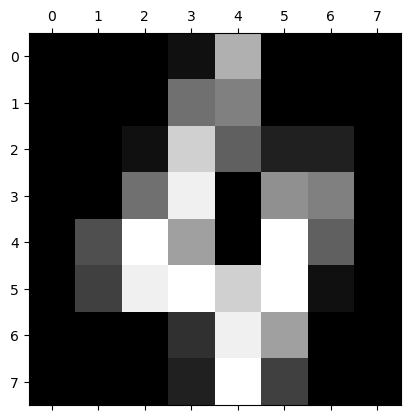

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[4])

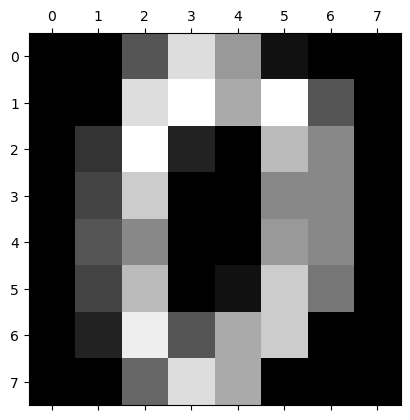

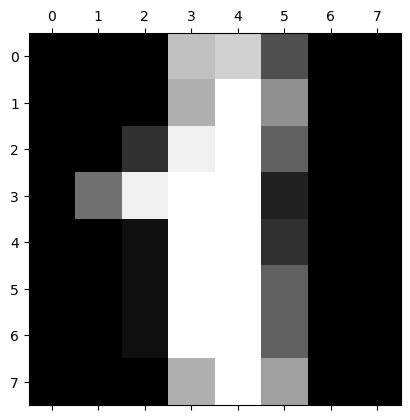

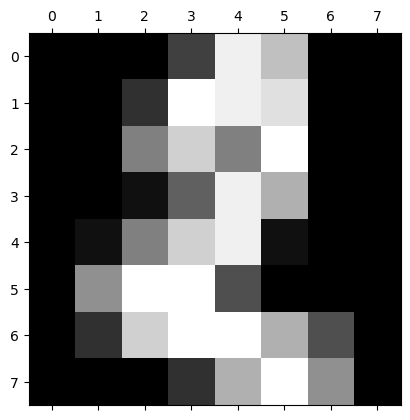

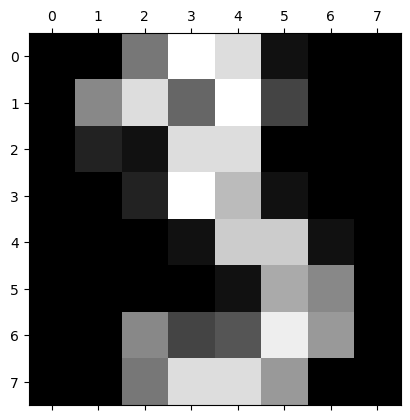

In [4]:
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [7]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
x_data=df.drop('target',axis='columns')
x_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
y_data=df.target
y_data

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [17]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1309,0.0,0.0,4.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,5.0,16.0,8.0,11.0,11.0,0.0
142,0.0,0.0,13.0,14.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,13.0,14.0,12.0,12.0,0.0,0.0
1551,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,0.0,10.0,16.0,10.0,0.0
1191,0.0,0.0,2.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,...,16.0,6.0,0.0,0.0,2.0,13.0,14.0,16.0,12.0,1.0
60,0.0,0.0,10.0,15.0,14.0,4.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,14.0,12.0,15.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,0.0,0.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,14.0,12.0,3.0,0.0,0.0
691,0.0,0.0,1.0,9.0,15.0,15.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,0.0,0.0
1395,0.0,0.0,8.0,16.0,15.0,4.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0
900,0.0,0.0,0.0,4.0,15.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,16.0,2.0,0.0,0.0


**Using mutiple dicission tree to get the output**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model=RandomForestClassifier(n_estimators=150)

In [50]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [51]:
model.score (x_test,y_test)

0.9861111111111112

In [66]:
model.predict([digits.data[67]])

array([6])

**Use confusion matrix**

In [55]:
y_predicted=model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix

In [59]:
con_mat= confusion_matrix(y_predicted,y_test)
con_mat

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0, 30]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

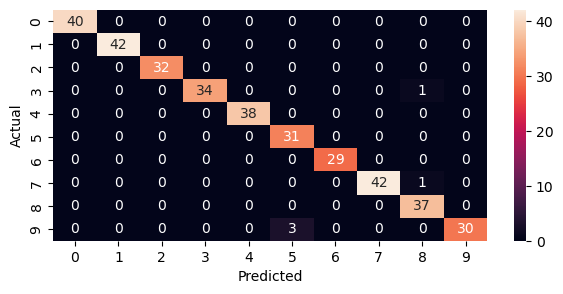

In [65]:
import seaborn as sns
plt.figure(figsize=(7,3))
sns.heatmap(con_mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Exercise**

<img src='iris.png' width=200 height='100'/>

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [69]:
import pandas as pd
from sklearn.datasets import load_iris
iris_data=load_iris()

In [71]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
x_data=df
x_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
y_data=pd.DataFrame(iris_data.target,columns=['target'])
y_data

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model=RandomForestClassifier(n_estimators=10)

In [90]:
model.fit(x_train,y_train)

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10)

In [91]:
model.score(x_train,y_train)

0.9916666666666667

In [96]:
model.predict(x_test)

array([1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 1, 2, 1])

In [96]:
model.predict(x_test)

array([1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 1, 2, 1])

In [106]:
model.predict(np.array([['5.1','3.5','1.4','0.2']]))

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])